In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("fifa_data.csv")

In [6]:
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Which country has the most number of players?

In [8]:
most_players_country = df['Nationality'].value_counts().idxmax()
print(f"Country with the most players: {most_players_country}")

Country with the most players: England


### 2. Plot a bar chart of the top 5 countries with the most players

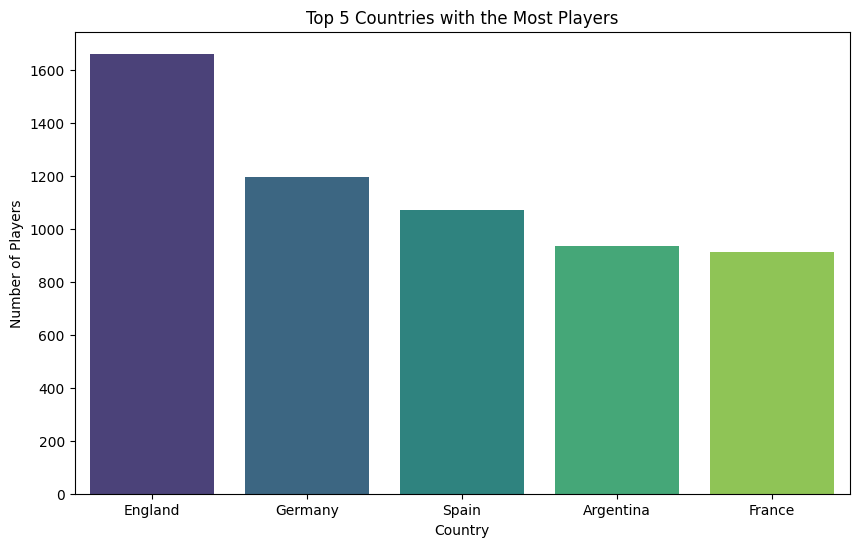

In [9]:
top_countries = df['Nationality'].value_counts().nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 5 Countries with the Most Players')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.show()


### 3.Which player has the highest salary?

In [11]:
df['Wage'] = df['Wage'].replace('[\€,K]', '', regex=True).astype(float)

# Find the player with the highest salary
highest_salary_player = df.loc[df['Wage'].idxmax(), 'Name']
highest_salary_value = df['Wage'].max()

print(f"Player with the highest salary: {highest_salary_player}")
print(f"Highest salary value: €{highest_salary_value}K per week")

Player with the highest salary: L. Messi
Highest salary value: €565.0K per week


### 4. Plot a histogram to get the salary range of the players

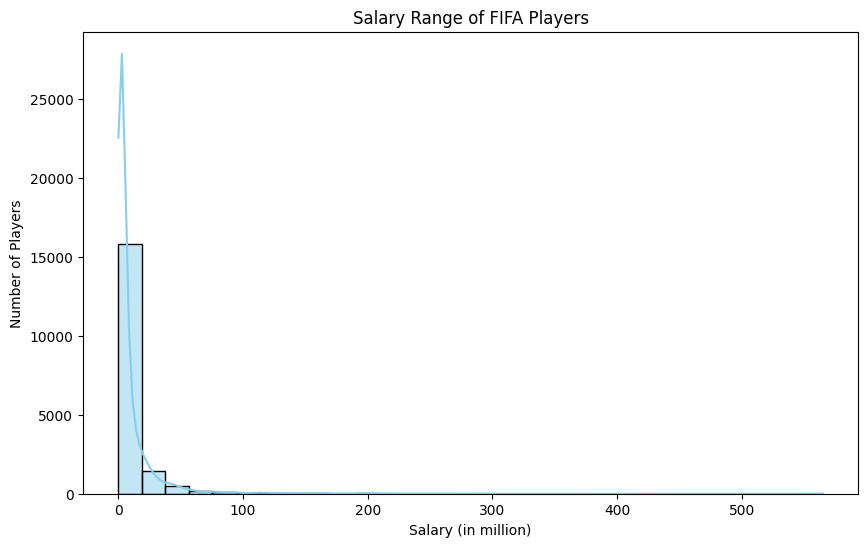

In [14]:
df['Wage'] = df['Wage'].replace('[\€,K]', '', regex=True).astype(float)

# Plot a histogram to get the salary range of the players
plt.figure(figsize=(10, 6))
sns.histplot(df['Wage'], bins=30, kde=True, color='skyblue')
plt.title('Salary Range of FIFA Players')
plt.xlabel('Salary (in million)')
plt.ylabel('Number of Players')
plt.show()

### 5. Who is the tallest player in the FIFA players?

In [17]:
df[['Feet', 'Inches']] = df['Height'].str.split("'", expand=True)

# Convert 'Feet' and 'Inches' to numeric format, handling NaN values
df['Feet'] = pd.to_numeric(df['Feet'], errors='coerce')
df['Inches'] = pd.to_numeric(df['Inches'].str.rstrip('"'), errors='coerce')

# Calculate 'Height_numeric' in inches
df['Height_numeric'] = df['Feet'].fillna(0) * 12 + df['Inches'].fillna(0)

# Find the player with the highest height
tallest_player = df.loc[df['Height_numeric'].idxmax(), 'Name']
print(f"Tallest player in FIFA: {tallest_player}")

Tallest player in FIFA: T. Holý


### 6. Which club has the most number of players?

In [18]:
most_players_club = df['Club'].value_counts().idxmax()
print(f"Club with the most players: {most_players_club}")

Club with the most players: FC Barcelona


### 7. Which foot is most preferred by the players? Draw a bar chart for preferred foot

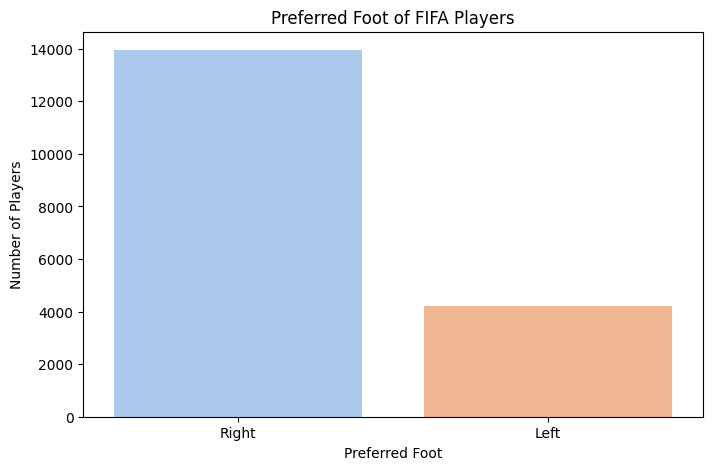

In [19]:
preferred_foot_count = df['Preferred Foot'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=preferred_foot_count.index, y=preferred_foot_count.values, palette='pastel')
plt.title('Preferred Foot of FIFA Players')
plt.xlabel('Preferred Foot')
plt.ylabel('Number of Players')
plt.show()